## Regression Plot
### seaborn.lmplot
seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
Plot data and regression model fits across a FacetGrid.

This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

When thinking about how to assign variables to different facets, a general rule is that it makes sense to use hue for the most important comparison, followed by col and row. However, always think about your particular dataset and the goals of the visualization you are creating.

There are a number of mutually exclusive options for estimating the regression model. See the tutorial for more information.

The parameters to this function span most of the options in FacetGrid, although there may be occasional cases where you will want to use that class and regplot() directly.

Parameters
x, ystrings, optional
Input variables; these should be column names in data.

dataDataFrame
Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

hue, col, rowstrings
Variables that define subsets of the data, which will be drawn on separate facets in the grid. See the *_order parameters to control the order of levels of this variable.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

col_wrapint, optional
“Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet.

heightscalar, optional
Height (in inches) of each facet. See also: aspect.

aspectscalar, optional
Aspect ratio of each facet, so that aspect * height gives the width of each facet in inches.

markersmatplotlib marker code or list of marker codes, optional
Markers for the scatterplot. If a list, each marker in the list will be used for each level of the hue variable.

share{x,y}bool, ‘col’, or ‘row’ optional
If true, the facets will share y axes across columns and/or x axes across rows.

{hue,col,row}_orderlists, optional
Order for the levels of the faceting variables. By default, this will be the order that the levels appear in data or, if the variables are pandas categoricals, the category order.

legendbool, optional
If True and there is a hue variable, add a legend.

legend_outbool, optional
If True, the figure size will be extended, and the legend will be drawn outside the plot on the center right.

x_estimatorcallable that maps vector -> scalar, optional
Apply this function to each unique value of x and plot the resulting estimate. This is useful when x is a discrete variable. If x_ci is given, this estimate will be bootstrapped and a confidence interval will be drawn.

x_binsint or vector, optional
Bin the x variable into discrete bins and then estimate the central tendency and a confidence interval. This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions of the bin centers. When this parameter is used, it implies that the default of x_estimator is numpy.mean.

x_ci“ci”, “sd”, int in [0, 100] or None, optional
Size of the confidence interval used when plotting a central tendency for discrete values of x. If "ci", defer to the value of the ci parameter. If "sd", skip bootstrapping and show the standard deviation of the observations in each bin.

scatterbool, optional
If True, draw a scatterplot with the underlying observations (or the x_estimator values).

fit_regbool, optional
If True, estimate and plot a regression model relating the x and y variables.

ciint in [0, 100] or None, optional
Size of the confidence interval for the regression estimate. This will be drawn using translucent bands around the regression line. The confidence interval is estimated using a bootstrap; for large datasets, it may be advisable to avoid that computation by setting this parameter to None.

n_bootint, optional
Number of bootstrap resamples used to estimate the ci. The default value attempts to balance time and stability; you may want to increase this value for “final” versions of plots.

unitsvariable name in data, optional
If the x and y observations are nested within sampling units, those can be specified here. This will be taken into account when computing the confidence intervals by performing a multilevel bootstrap that resamples both units and observations (within unit). This does not otherwise influence how the regression is estimated or drawn.

seedint, numpy.random.Generator, or numpy.random.RandomState, optional
Seed or random number generator for reproducible bootstrapping.

orderint, optional
If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

logisticbool, optional
If True, assume that y is a binary variable and use statsmodels to estimate a logistic regression model. Note that this is substantially more computationally intensive than linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.

lowessbool, optional
If True, use statsmodels to estimate a nonparametric lowess model (locally weighted linear regression). Note that confidence intervals cannot currently be drawn for this kind of model.

robustbool, optional
If True, use statsmodels to estimate a robust regression. This will de-weight outliers. Note that this is substantially more computationally intensive than standard linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.

logxbool, optional
If True, estimate a linear regression of the form y ~ log(x), but plot the scatterplot and regression model in the input space. Note that x must be positive for this to work.

{x,y}_partialstrings in data or matrices
Confounding variables to regress out of the x or y variables before plotting.

truncatebool, optional
If True, the regression line is bounded by the data limits. If False, it extends to the x axis limits.

{x,y}_jitterfloats, optional
Add uniform random noise of this size to either the x or y variables. The noise is added to a copy of the data after fitting the regression, and only influences the look of the scatterplot. This can be helpful when plotting variables that take discrete values.

{scatter,line}_kwsdictionaries
Additional keyword arguments to pass to plt.scatter and plt.plot.

Examples

These examples focus on basic regression model plots to exhibit the various faceting options; see the regplot() docs for demonstrations of the other options for plotting the data and models. There are also other examples for how to manipulate plot using the returned object on the FacetGrid docs.

Plot a simple linear relationship between two variables:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


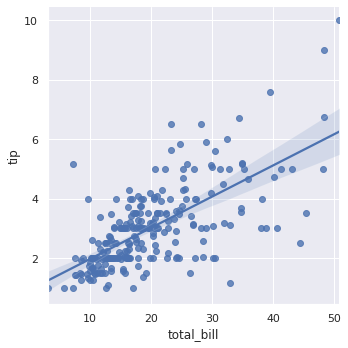

In [4]:
ax = sns.lmplot(x='total_bill', y='tip',data=tips)

Condition on a third variable and plot the levels in different colors:

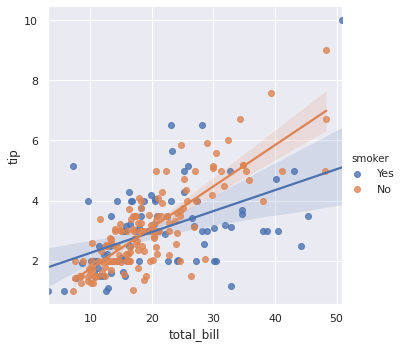

In [5]:
ax = sns.lmplot(x='total_bill', y='tip', hue='smoker',data=tips)

Use different markers as well as colors so the plot will reproduce to black-and-white more easily:

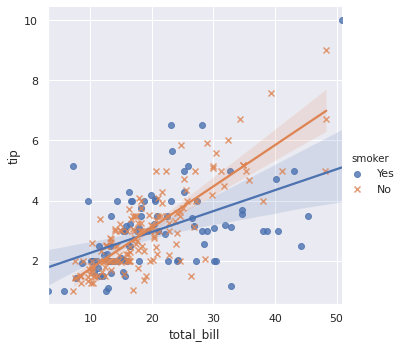

In [6]:
ax = sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, markers=['o', 'x'])

Use a different color palette:

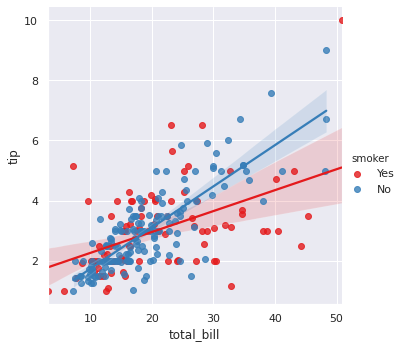

In [8]:
ax = sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, palette='Set1')

Map hue levels to colors with a dictionary:

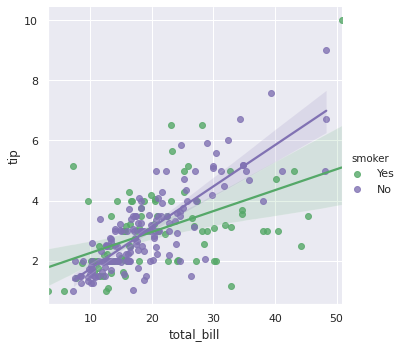

In [11]:
ax = sns.lmplot(x='total_bill', y='tip', hue='smoker', 
                data=tips, palette= dict(Yes='g', No='m'))

Map hue levels to colors with a dictionary:

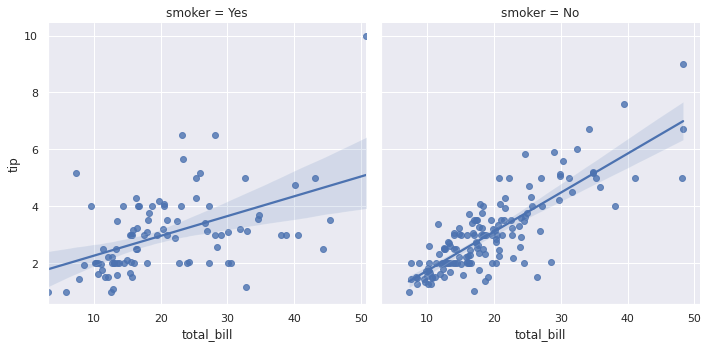

In [12]:
ax = sns.lmplot(x='total_bill', y='tip', data=tips, col='smoker')

Change the height and aspect ratio of the facets:

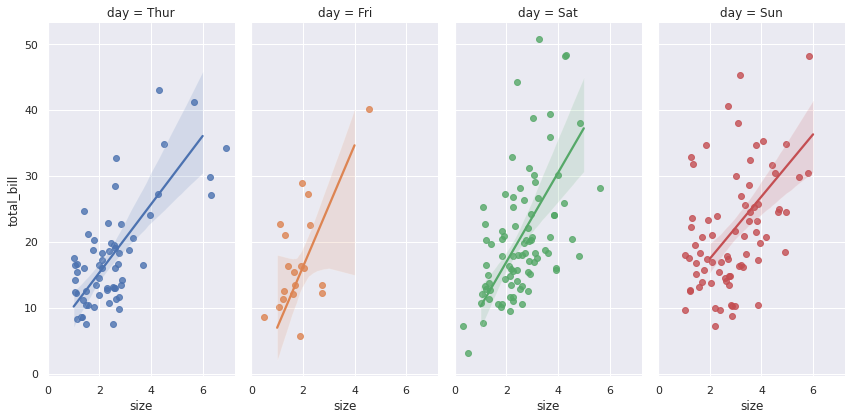

In [15]:
ax = sns.lmplot(x='size', y='total_bill', hue='day', col='day', data=tips, height=6, aspect=0.5, x_jitter=1)

Wrap the levels of the column variable into multiple rows:

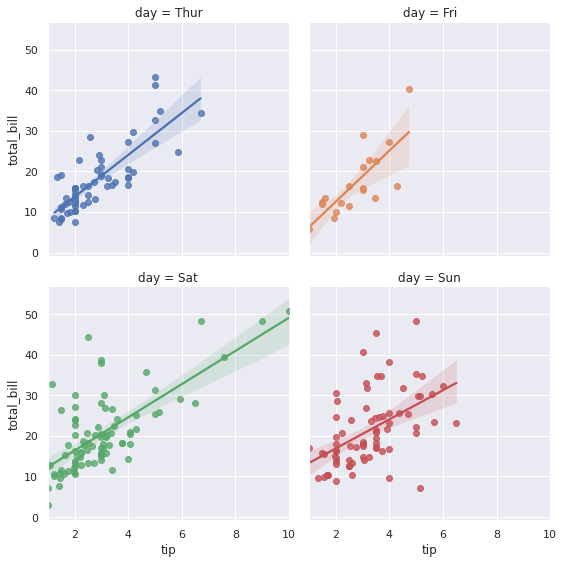

In [19]:
ax = sns.lmplot(x='tip',y='total_bill', hue='day', col='day',
                col_wrap=2, data=tips, height=4)

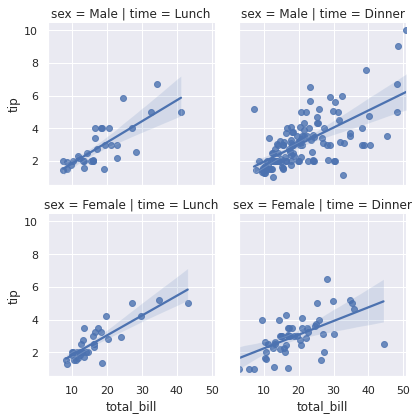

In [20]:
#Condition on two variables to make a full grid:

g = sns.lmplot(x="total_bill", y="tip", row="sex", col="time",
               data=tips, height=3)